# Regressão Softmax com dados do MNIST

## Objetivo

O objetivo deste notebook é ilustrar o uso de praticamente a mesma rede desenvolvida para a classificação das flores Íris, porém agora com o problema de classificação de dígitos manuscritos utilizando o dataset MNIST.
As principais diferenças são:
- tipo do dado, agora imagem com muito atributos: 28 x 28 pixels
- número de amostras, muito maior, 60 mil
Neste exercício será possível a interpretação do significado dos parâmetros treinados

## Importação das bibliotecas

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from torch.autograd import Variable
import torch
import torchvision

## Carregamento dos dados do MNIST

In [2]:
! git clone https://github.com/vcasadei/MNIST.git

Cloning into 'MNIST'...
remote: Enumerating objects: 10, done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 10
Receiving objects: 100% (10/10), 11.01 MiB | 11.24 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Updating files: 100% (6/6), done.


In [3]:
dataset_dir = 'MNIST/'

x_train, y_train = torch.load(dataset_dir + 'processed/training.pt')

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 60000

Dimensões dos dados das imagens:    torch.Size([60000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Carregamento, normalização e seleção dos dados do MNIST

Neste exemplo utilizaremos apenas 1000 amostras de treinamento.

In [4]:
x_train = x_train.float()

x_train = x_train / 255.

if True:
    n_samples_train = 1000

    x_train = x_train[:n_samples_train]
    y_train = y_train[:n_samples_train]

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 1000

Dimensões dos dados das imagens:    torch.Size([1000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0.) tensor(1.)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Visualizando os dados

(-0.5, 232.5, 87.5, -0.5)

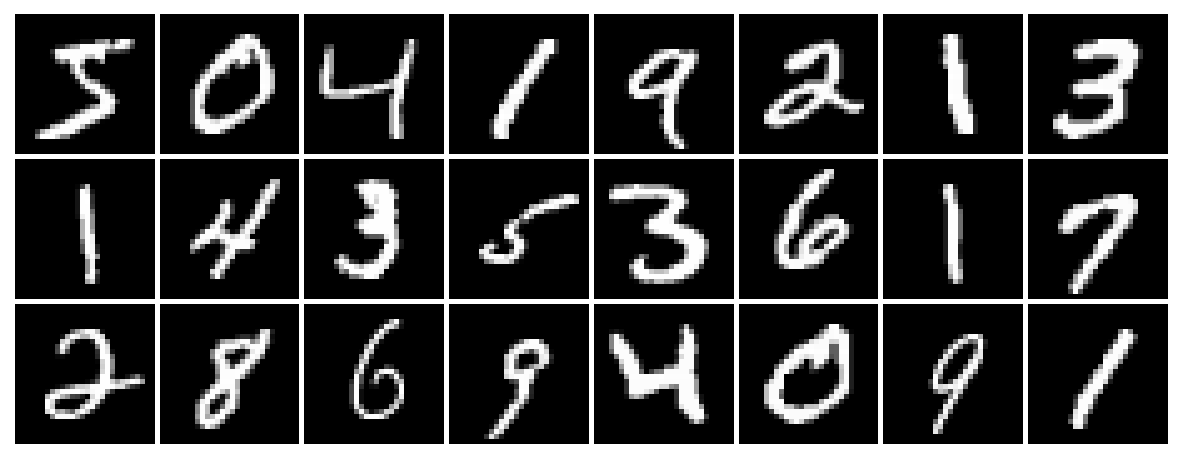

In [5]:
n_samples = 24

# cria um grid com as imagens
grid = torchvision.utils.make_grid(x_train[:n_samples].unsqueeze(1), pad_value=1.0, padding=1)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off')

### Visualizando uma imagem com o matplotlib

class: tensor(5)


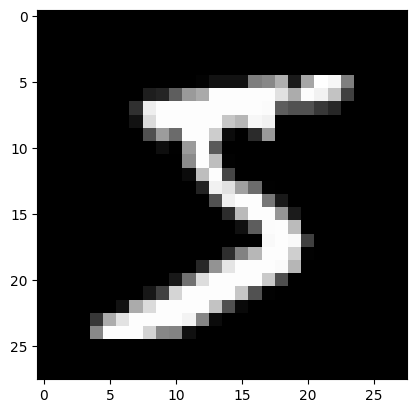

In [6]:
image  = x_train[0]
target = y_train[0]

plt.imshow(image.numpy().reshape(28,28), cmap='gray')
print('class:', target)

## Modelo

In [7]:
model = torch.nn.Linear(28*28, 10) # 28*28 atributos de entrada e 10 neurônios na sáida

### Testando um predict com poucas amostras

In [8]:
## TODO

## Treinamento

### Inicialização dos parâmetros

In [9]:
epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Visualização do grafo computacional da perda (loss)

In [10]:
!pip install graphviz
!pip install git+https://github.com/szagoruyko/pytorchviz

  Cloning https://github.com/szagoruyko/pytorchviz to /tmp/pip-req-build-yyymbqhh
  Running command git clone --filter=blob:none --quiet https://github.com/szagoruyko/pytorchviz /tmp/pip-req-build-yyymbqhh
  Resolved https://github.com/szagoruyko/pytorchviz to commit 0adcd83af8aa7ab36d6afd139cabbd9df598edb7
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.10

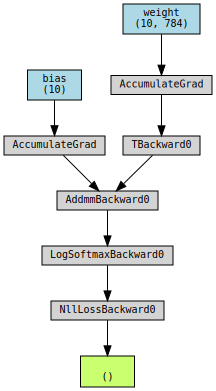

In [11]:
y_pred = model(Variable(x_train.view(-1,28*28)))
loss = criterion(y_pred, Variable(y_train))
from torchviz import make_dot, make_dot_from_trace
p = make_dot(loss, dict(model.named_parameters()))
p

### Laço de treinamento dos pesos

In [12]:
from IPython import display
import numpy
a = 5
losses = []
zs = []
fig = plt.figure(figsize=(18, 6))

try:
    for i in range(epochs):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # Predict da rede
        outputs = model(inputs)
        zs.append(outputs[1].detach().numpy())

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.data)
        _, predicts = torch.max(outputs, 1)

        y_pred = predicts.data
        accuracy = (y_pred.numpy() == y_train.numpy()).mean()

except KeyboardInterrupt:
    pass

<Figure size 1800x600 with 0 Axes>

In [13]:
model.weight.grad

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [14]:
print('Final loss:', loss.data)

Final loss: tensor(1.0947)


### Visualizando gráfico de perda durante o treinamento

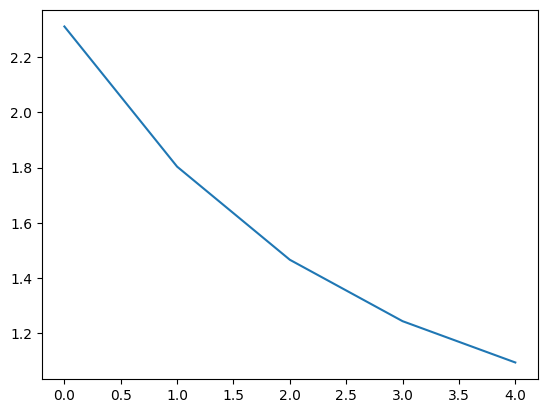

In [15]:
plt.plot(losses)

## Avaliação

### Acurácia tanto no conjunto de treinamento como no conjunto de testes

In [16]:
def predict(model, input_data):
    outputs = model(Variable(input_data))
    _, predicts = torch.max(outputs, 1)

    return predicts.data

y_pred = predict(model, x_train.view(-1, 28*28))
accuracy = (y_pred.numpy() == y_train.numpy()).mean()
print('Accuracy:', accuracy)

Accuracy: 0.817


### Matriz de confusão com dados de treinamento e teste

In [17]:
print('Matriz de confusão:')
pd.crosstab(y_pred.numpy(), y_train.numpy())

Matriz de confusão:


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,94,0,4,3,1,8,2,1,0,2
1,0,109,13,1,2,3,2,5,7,2
2,1,0,71,1,1,2,1,1,3,0
3,0,1,0,78,1,11,0,0,7,1
4,0,0,2,0,88,7,3,3,0,7
5,0,1,0,2,0,50,0,0,4,2
6,2,1,2,1,3,3,86,0,1,1
7,0,1,5,4,0,1,0,104,0,9
8,0,3,1,2,1,3,0,0,63,2


## Visualizando a matriz de pesos treinados

Observe que a matriz de peso treinado para cada classe mostra a importância dos pesos associados aos caracteres de cada classe.

weights: torch.Size([10, 784])
bias:    torch.Size([10])


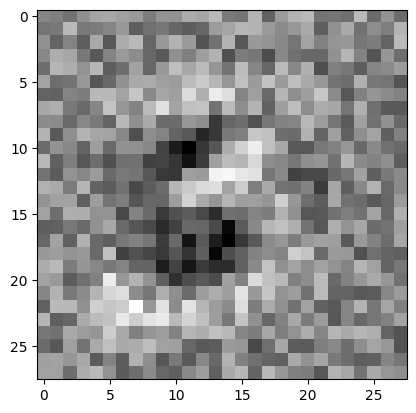

In [18]:
weights = model.state_dict()['weight']
print('weights:', weights.shape)

bias = model.state_dict()['bias']
print('bias:   ', bias.shape)

# Visualizando pesos da classe 3
plt.imshow(weights[3, :].numpy().reshape((28,28)),cmap = 'gray')
plt.show()

### Visualizando os pesos de todas as classes

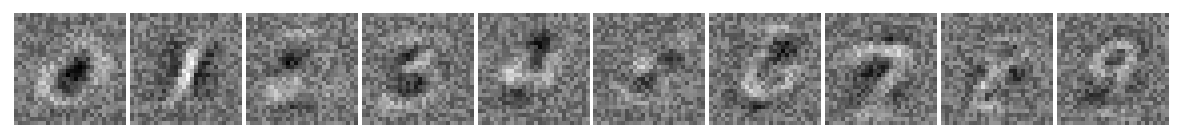

In [19]:
# cria um grid com as imagens
grid = torchvision.utils.make_grid(weights.view(-1, 1, 28, 28), normalize=True, pad_value=1.0, padding=1, nrow=10)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off');

### Diagrama da regressão softmax com visualização dos pesos W

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoSoftmaxArgmaxNMIST.png)

# Atividades

## Exercícios

- 1) Insira código no laço do treinamento para que no final de cada época,
     seja impresso: o número da época e a perda e a acurácia

Época: 1/5, Loss: 0.393553, Accuracy: 0.920000
Época: 2/5, Loss: 0.288928, Accuracy: 0.920000
Época: 3/5, Loss: 0.329302, Accuracy: 0.930000
Época: 4/5, Loss: 0.209059, Accuracy: 0.930000
Época: 5/5, Loss: 0.227467, Accuracy: 0.910000
Final loss: tensor(0.2275)


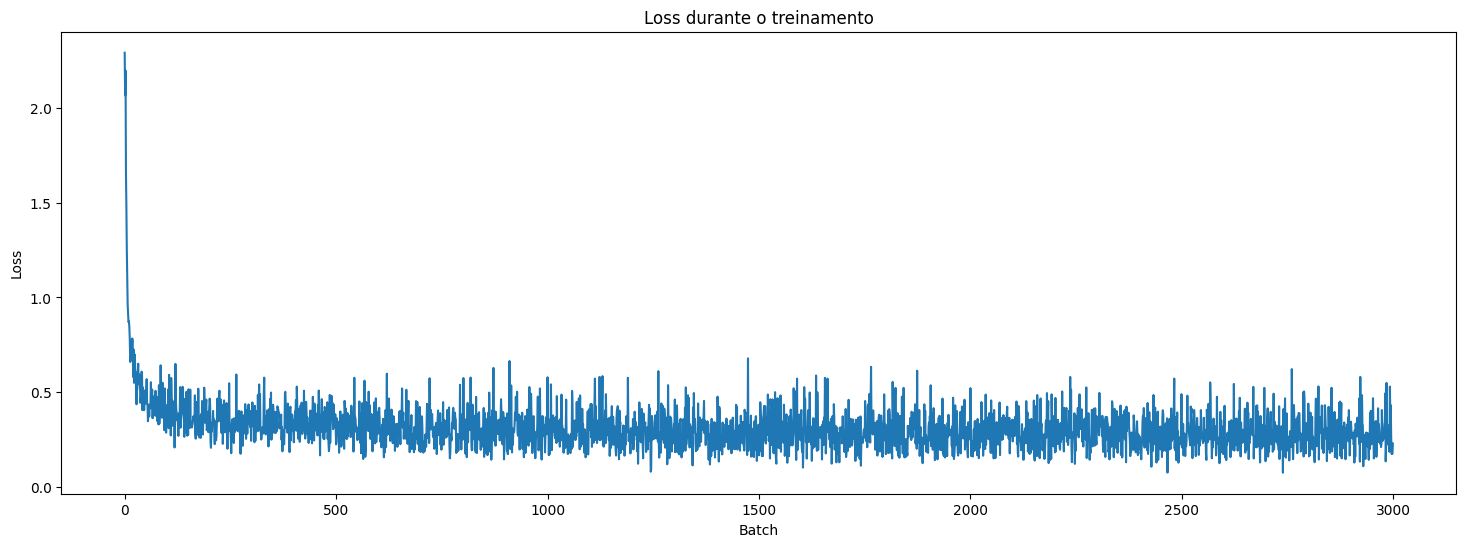

Accuracy: 0.921
Matriz de confusão:
weights: torch.Size([10, 784])
bias:    torch.Size([10])


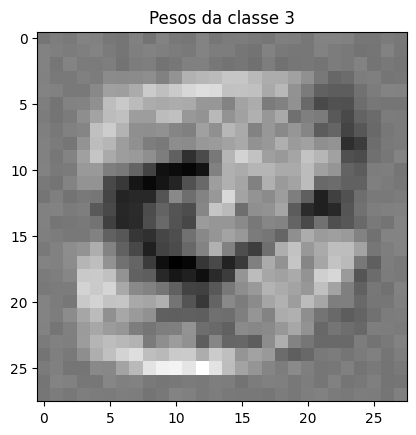

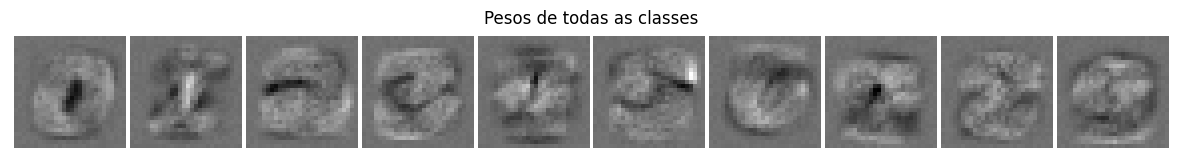

In [23]:
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST

# Configurações do treinamento
batch_size = 100
epochs = 5
learningRate = 0.5

# Carregamento e preparação dos dados do MNIST
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

# Criação do modelo
model = torch.nn.Linear(28*28, 10)

# Função de perda e otimizador
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

# Inicialização de variáveis para monitoramento
from IPython import display
losses = []
zs = []

fig = plt.figure(figsize=(18, 6))

try:
    for epoch in range(epochs):
        for batch_idx, (x_batch, y_batch) in enumerate(loader_train):
            # Transforma a entrada para uma dimensão
            inputs = Variable(x_batch.view(-1, 28 * 28))
            # Predict da rede
            outputs = model(inputs)
            zs.append(outputs[1].detach().numpy())

            # Calcula a perda
            loss = criterion(outputs, Variable(y_batch))

            # Zero, backpropagation, ajusta parâmetros pelo gradiente descendente
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            losses.append(loss.data)

            _, predicts = torch.max(outputs, 1)
            y_pred = predicts.data
            accuracy = (y_pred.numpy() == y_batch.numpy()).mean()

        print(f'Época: {epoch+1}/{epochs}, Loss: {loss.data:.6f}, Accuracy: {accuracy:.6f}')
except KeyboardInterrupt:
    pass

print('Final loss:', loss.data)

# Visualizando gráfico de perda durante o treinamento
plt.plot(losses)
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.title('Loss durante o treinamento')
plt.show()

# Acurácia no conjunto de treinamento
def predict(model, input_data):
    outputs = model(Variable(input_data))
    _, predicts = torch.max(outputs, 1)
    return predicts.data

y_pred = predict(model, x_train.view(-1, 28*28))
accuracy = (y_pred.numpy() == y_train.numpy()).mean()
print('Accuracy:', accuracy)

# Matriz de confusão
print('Matriz de confusão:')
pd.crosstab(y_pred.numpy(), y_train.numpy())

# Visualizando a matriz de pesos treinados
weights = model.state_dict()['weight']
print('weights:', weights.shape)
bias = model.state_dict()['bias']
print('bias:   ', bias.shape)

# Visualizando pesos da classe 3
plt.imshow(weights[3, :].numpy().reshape((28,28)), cmap='gray')
plt.title('Pesos da classe 3')
plt.show()

# Visualizando os pesos de todas as classes
grid = torchvision.utils.make_grid(weights.view(-1, 1, 28, 28), normalize=True, pad_value=1.0, padding=1, nrow=10)
plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off')
plt.title('Pesos de todas as classes')
plt.show()


- 2) Insira código no laço do treinamento para visualização dos valores dos gradientes referentes à classe do dígito 4, no final de cada época.

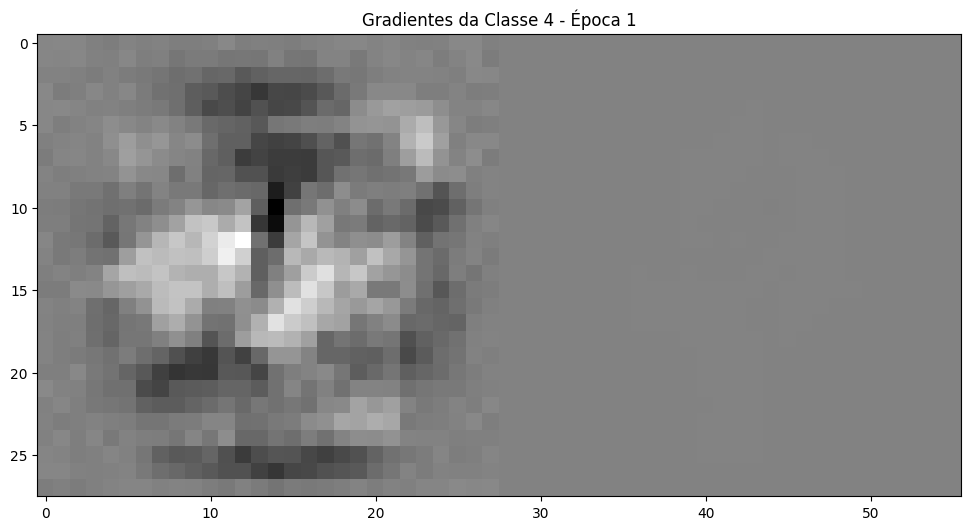

In [ ]:
from IPython import display
import numpy
losses = []
zs = []

fig = plt.figure(figsize=(18, 6))

try:
    for epoch in range(epochs):
        for batch_idx, (x_batch, y_batch) in enumerate(loader_train):
            # Transforma a entrada para uma dimensão
            inputs = Variable(x_batch.view(-1, 28 * 28))
            # Predict da rede
            outputs = model(inputs)
            zs.append(outputs[1].detach().numpy())

            # Calcula a perda
            loss = criterion(outputs, Variable(y_batch))

            # Zero, backpropagation, ajusta parâmetros pelo gradiente descendente
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            losses.append(loss.data)

            weights_d = model.weight.data[4].numpy().reshape(28, 28)
            weights_g = model.weight.grad.data[4].numpy().reshape(28, 28)
            ww = np.concatenate((weights_d, weights_g), 1)
            plt.imshow(ww, cmap='gray')
            plt.title(f'Gradientes da Classe 4 - Época {epoch+1}')
            display.display(fig)
            display.clear_output(wait=True)

            _, predicts = torch.max(outputs, 1)
            y_pred = predicts.data
            accuracy = (y_pred.numpy() == y_batch.numpy()).mean()

        print(f'Época: {epoch+1}/{epochs}, Loss: {loss.data:.6f}, Accuracy: {accuracy:.6f}')
except KeyboardInterrupt:
    pass

print('Final loss:', loss.data)


<details>
<summary>Mostrar Resultado</summary>

```python
from IPython import display
import numpy
a = 5
losses = []
zs = []
fig = plt.figure(figsize=(18, 6))

try:
    for i in range(epochs):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # Predict da rede
        outputs = model(inputs)
        zs.append(outputs[1].detach().numpy())

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.data)
        weights_d = model.weight.data[4].numpy().reshape(28,28)
        weights_g = model.weight.grad.data[4].numpy().reshape(28,28)
        ww = np.concatenate((weights_d,weights_g),1)
        plt.imshow(ww.reshape((28,28*2)),cmap = 'gray')
        display.display(fig)
        display.clear_output(wait=True)
        input(i)
        
        _, predicts = torch.max(outputs, 1)

        y_pred = predicts.data
        accuracy = (y_pred.numpy() == y_train.numpy()).mean()
        print('Accuracy:', accuracy)
        print("epoca: " + str(i + 1))
        print("perda: " + str(loss.data.detach().numpy()))
except KeyboardInterrupt:
    pass
```

</details>



## Perguntas

1. Qual é o shape da matriz de entrada na rede?

* O shape da matriz de entrada na rede é (n_samples, 28 * 28), onde n_samples é o número de amostras e 28 * 28 é o número de pixels em cada imagem.

In [ ]:
x_train_reshaped = x_train.view(-1, 28 * 28)
print("Shape da matriz de entrada:", x_train_reshaped.shape)

2. Qual é o shape da saída da rede?

* O shape da saída da rede é (n_samples, 10), onde n_samples é o número de amostras e 10 é o número de classes.

In [ ]:
x_sample = x_train[:5].view(-1, 28 * 28)
output = model(x_sample)
print("Shape da saída da rede:", output.shape)


3. Qual é o número total de parâmetros da rede, incluindo o bias?

* A rede possui 28 * 28 * 10 + 10 parâmetros, onde 28 * 28 * 10 são os pesos da camada densa e 10 são os bias.

In [ ]:
num_params = sum(p.numel() for p in model.parameters())
print("Número total de parâmetros (incluindo bias):", num_params)

# Aprendizados


- **Visualização de Gradientes**:
   - Aprendemos como visualizar os gradientes de uma classe específica durante o treinamento, o que ajuda a entender como os pesos são ajustados.

- **Monitoramento de Desempenho**:
   - Implementamos a impressão de métricas como perda e acurácia a cada época para monitorar o desempenho do modelo durante o treinamento.

- **Manipulação de Dados com PyTorch**:
   - Praticamos a manipulação de dados, incluindo a normalização e a transformação de entradas para a forma adequada para a rede.

- **Arquitetura de Rede**:
   - Entendemos a estrutura de uma rede neural simples para classificação de dígitos, incluindo como configurar a entrada e saída do modelo.

- **Uso de Funções PyTorch**:
   - Utilizamos funções do PyTorch para calcular a perda, realizar o backpropagation e atualizar os parâmetros do modelo.

- **Avaliação de Modelo**:
   - Avaliamos o modelo treinado calculando a acurácia e visualizando a matriz de confusão para entender melhor o desempenho do classificador.

- **Visualização de Pesos**:
   - Visualizamos os pesos treinados para cada classe, o que fornece insights sobre como a rede está aprendendo a distinguir entre diferentes classes.